In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import pandas as pd

In [4]:
filepath = "DC_Properties.csv"

df = pd.read_csv(filepath)
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [19]:
#df.dropna(axis='PRICE')

df = df.dropna(how='all', subset=['PRICE'])
print("Contents of the Modified Dataframe : ")
print(df)


Contents of the Modified Dataframe : 
        Unnamed: 0  BATHRM  HF_BATHRM           HEAT AC  NUM_UNITS  ROOMS  \
0                0       4          0      Warm Cool  Y        2.0      8   
2                2       3          1  Hot Water Rad  Y        2.0      9   
3                3       3          1  Hot Water Rad  Y        2.0      8   
5                5       3          2  Hot Water Rad  Y        1.0     10   
7                7       3          1  Hot Water Rad  Y        2.0      8   
8                8       3          1      Warm Cool  Y        2.0      7   
14              14       3          1      Warm Cool  Y        2.0      5   
16              16       3          1      Warm Cool  Y        1.0      8   
19              19       3          1  Hot Water Rad  Y        2.0      9   
20              20       3          1  Hot Water Rad  Y        1.0     14   
22              22       1          0     Forced Air  Y        1.0      6   
23              23       2          1 

In [20]:

mean = df['PRICE'].mean()

std = df['PRICE'].std()

price_z_manual = (df['PRICE'] - mean)/std
mean, std

(931351.5949336156, 7061324.955612032)

In [21]:
price_z_manual.head()

0    0.023175
2    0.165500
3    0.094975
5    0.144257
7    0.016803
Name: PRICE, dtype: float64

In [22]:
scaler = StandardScaler()
price_zscore = scaler.fit_transform(df[['PRICE']])

In [26]:

price_z_col = pd.Series(price_zscore.reshape(-1))
price_z_col.head()

0    0.023175
1    0.165501
2    0.094975
3    0.144258
4    0.016803
dtype: float64

In [23]:
price_zscore.mean(),price_zscore.std()

(-4.630074029551846e-18, 1.0)

In [27]:
minmax_sc = MinMaxScaler()

In [28]:
price_minmax=minmax_sc.fit_transform(df[['PRICE']])
price_mm_col = pd.Series(price_minmax.reshape(-1))
price_mm_col.head()

0    0.007968
1    0.015281
2    0.011657
3    0.014189
4    0.007640
dtype: float64

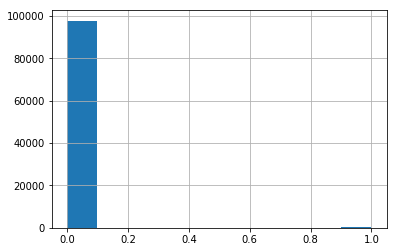

In [29]:
price_mm_col.hist()